In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    import halotools
except ImportError:
    print("Halotools must be installed to run this tutorial.  See halotools.readthedocs.io.")

# Tutorial

In [3]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname = 'bolplanck', redshift = 0.0)

In [13]:
mask = halocat.halo_table['halo_mpeak']>10**12

coords = np.vstack((halocat.halo_table['halo_x'],
                    halocat.halo_table['halo_y'],
                    halocat.halo_table['halo_z'])).T[mask]

In [21]:
from cuboid_remap.remap import remap, remap_Lbox

u1=[2,1,0]
u2=[0,0,1]
u3=[1,0,0]

new_coords = remap(coords, halocat.Lbox[0], u1, u2, u3)

L1, L2, L3 = remap_Lbox(u1,u2,u3)
L1 *= halocat.Lbox[0]
L2 *= halocat.Lbox[0]
L3 *= halocat.Lbox[0]

In [29]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def plot_cuboid(cube_definition):
    """
    plot a wireframe 3D cuboid
    """
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor((0,0,0,0))

    ax.add_collection3d(faces)

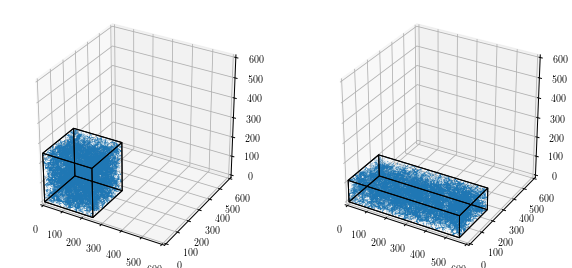

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121, projection='3d')
ax.set_aspect("equal")
ax.scatter(coords[:,0], coords[:,1], coords[:,2], s=0.5, edgecolors='none')
cube_definition = [
    (0,0,0), (0,halocat.Lbox[1],0), (halocat.Lbox[0],0,0), (0,0,halocat.Lbox[2])
]
plot_cube(cube_definition)
ax.set_xlim([0,600])
ax.set_ylim([0,600])
ax.set_zlim([0,600])

ax = fig.add_subplot(122, projection='3d')
ax.set_aspect("equal")
ax.scatter(new_coords[:,0], new_coords[:,1], new_coords[:,2], s=0.5, edgecolors='none')
cube_definition = [
    (0,0,0), (0,L2,0), (L1,0,0), (0,0,L3)
]
plot_cube(cube_definition)
ax.set_xlim([0,600])
ax.set_ylim([0,600])
ax.set_zlim([0,600])

plt.show()